In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
# plug in your favorite database here
dbFile = 'rolling_fpo_2nslice0.9_v1.6_10yrs.db'
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []
sql = ''
# list any columns you want to pass though here
metric = metrics.PassMetric(['observationStartMJD', 'filter', 'fiveSigmaDepth'])
# Here's at a single point, but could send in a list of RAs and Decs if you want to 
# do a few points
slicer = slicers.UserPointsSlicer(ra=200, dec=-10)
summaryStats = []
plotDict = {}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, summaryMetrics=summaryStats))

In [4]:
bg = metricBundles.MetricBundleGroup(bundleList, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Querying database SummaryAllProps with no constraint for columns ['observationStartMJD', 'fieldDec', 'fiveSigmaDepth', 'filter', 'fieldRA'].
Found 2222818 visits
Running:  ['opsim_Pass_observationStartMJD_filter_fiveSigmaDepth_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [5]:
# Here's the numpy array, with dtype matching the columns you requested above
bundleList[0].metricValues[0]

array([(60757.25271159,  -9.20404576, 24.03325346, 'r', 198.49938143),
       (60337.33238467,  -9.15854405, 22.80891916, 'z', 200.40135662),
       (63256.37475293,  -9.13478491, 23.99068086, 'r', 200.68524382),
       (61801.37406025,  -9.81264453, 22.12834185, 'y', 200.48369255),
       (62544.34732531,  -9.50618765, 23.34934677, 'z', 200.43892992),
       (62925.33320404,  -9.4471133 , 22.18921751, 'y', 200.47457816),
       (60337.31656309,  -9.15854405, 21.74751845, 'y', 200.40135662),
       (62544.33118711,  -9.50618765, 24.0481371 , 'i', 200.43892992),
       (61068.32280253,  -9.25384271, 23.57350856, 'i', 200.6337827 ),
       (61508.19716558, -10.20763076, 23.35179103, 'z', 200.55734215),
       (62276.04521353,  -9.53921547, 23.08747184, 'z', 200.86578938),
       (61508.18105526, -10.20763076, 24.07006725, 'i', 200.55734215),
       (61849.25081185,  -9.24410355, 24.04746206, 'r', 200.9610396 ),
       (61508.13970269, -10.20763076, 23.38893346, 'z', 200.55734215),
      

Text(0, 0.5, '5-sigma depth')

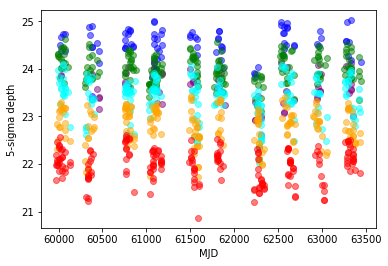

In [6]:
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
       'i': 'cyan', 'z': 'orange', 'y': 'red'}
i=0
mv = bundleList[0].metricValues[i]
for key in f2c:
    infilt = np.where(mv['filter'] == key)[0]
    plt.plot(mv['observationStartMJD'][infilt],
             mv['fiveSigmaDepth'][infilt], 'o', color=f2c[key], alpha=0.5)
plt.xlabel('MJD')
plt.ylabel('5-sigma depth')

In [7]:
season = mv['fiveSigmaDepth']*0
order = np.argsort(mv['observationStartMJD'])
diff = np.roll(mv['observationStartMJD'][order],-1) - mv['observationStartMJD'][order]

In [8]:
gaps = np.where(diff > 90)[0]
ack = gaps[1:] - gaps[0:-1]
print('n observations per season = ', ack)

n observations per season =  [ 83 102 129  95  85  88 105  71]
